In [2]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


plt.style.use('ggplot')

c:\Users\Morgan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
crime_full_df = pd.read_csv('../data/crimes_by_county.csv')
crime_full_df.head(5)

County                      Agency  Year  Months Reported  Index Total  \
0  Albany              Albany City PD  2021             12.0       3837.0   
1  Albany       Albany County Sheriff  2021             12.0         73.0   
2  Albany  Albany County State Police  2021             12.0        125.0   
3  Albany              Altamont Vg PD  2021             12.0          3.0   
4  Albany           Bethlehem Town PD  2021             12.0        329.0   

   Violent Total  Murder  Rape  Robbery  Aggravated Assault  Property Total  \
0          945.0    24.0  60.0    179.0               682.0          2892.0   
1           18.0     0.0   0.0      1.0                17.0            55.0   
2           43.0     0.0  27.0      1.0                15.0            82.0   
3            0.0     0.0   0.0      0.0                 0.0             3.0   
4           22.0     1.0   5.0      4.0                12.0           307.0   

   Burglary  Larceny  Motor Vehicle Theft             Region  
0     368.0   2170.0                354.0  Non-New York City  
1       9.0     41.0                  5.0  Non-New York City  
2       7.0     66.0                  9.0  Non-New York City  
3       0.0      3.0                  0.0  Non-New York City  
4      27.0    269.0                 11.0  Non-New York City

In [4]:
crime_full_df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21823 entries, 0 to 21822
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   County               21823 non-null  object 
 1   Agency               21823 non-null  object 
 2   Year                 21823 non-null  int64  
 3   Months Reported      12309 non-null  float64
 4   Index Total          21439 non-null  float64
 5   Violent Total        21439 non-null  float64
 6   Murder               21439 non-null  float64
 7   Rape                 21439 non-null  float64
 8   Robbery              21439 non-null  float64
 9   Aggravated Assault   21439 non-null  float64
 10  Property Total       21439 non-null  float64
 11  Burglary             21439 non-null  float64
 12  Larceny              21439 non-null  float64
 13  Motor Vehicle Theft  21439 non-null  float64
 14  Region               21823 non-null  object 
dtypes: float64(11), int64(1), object(3)


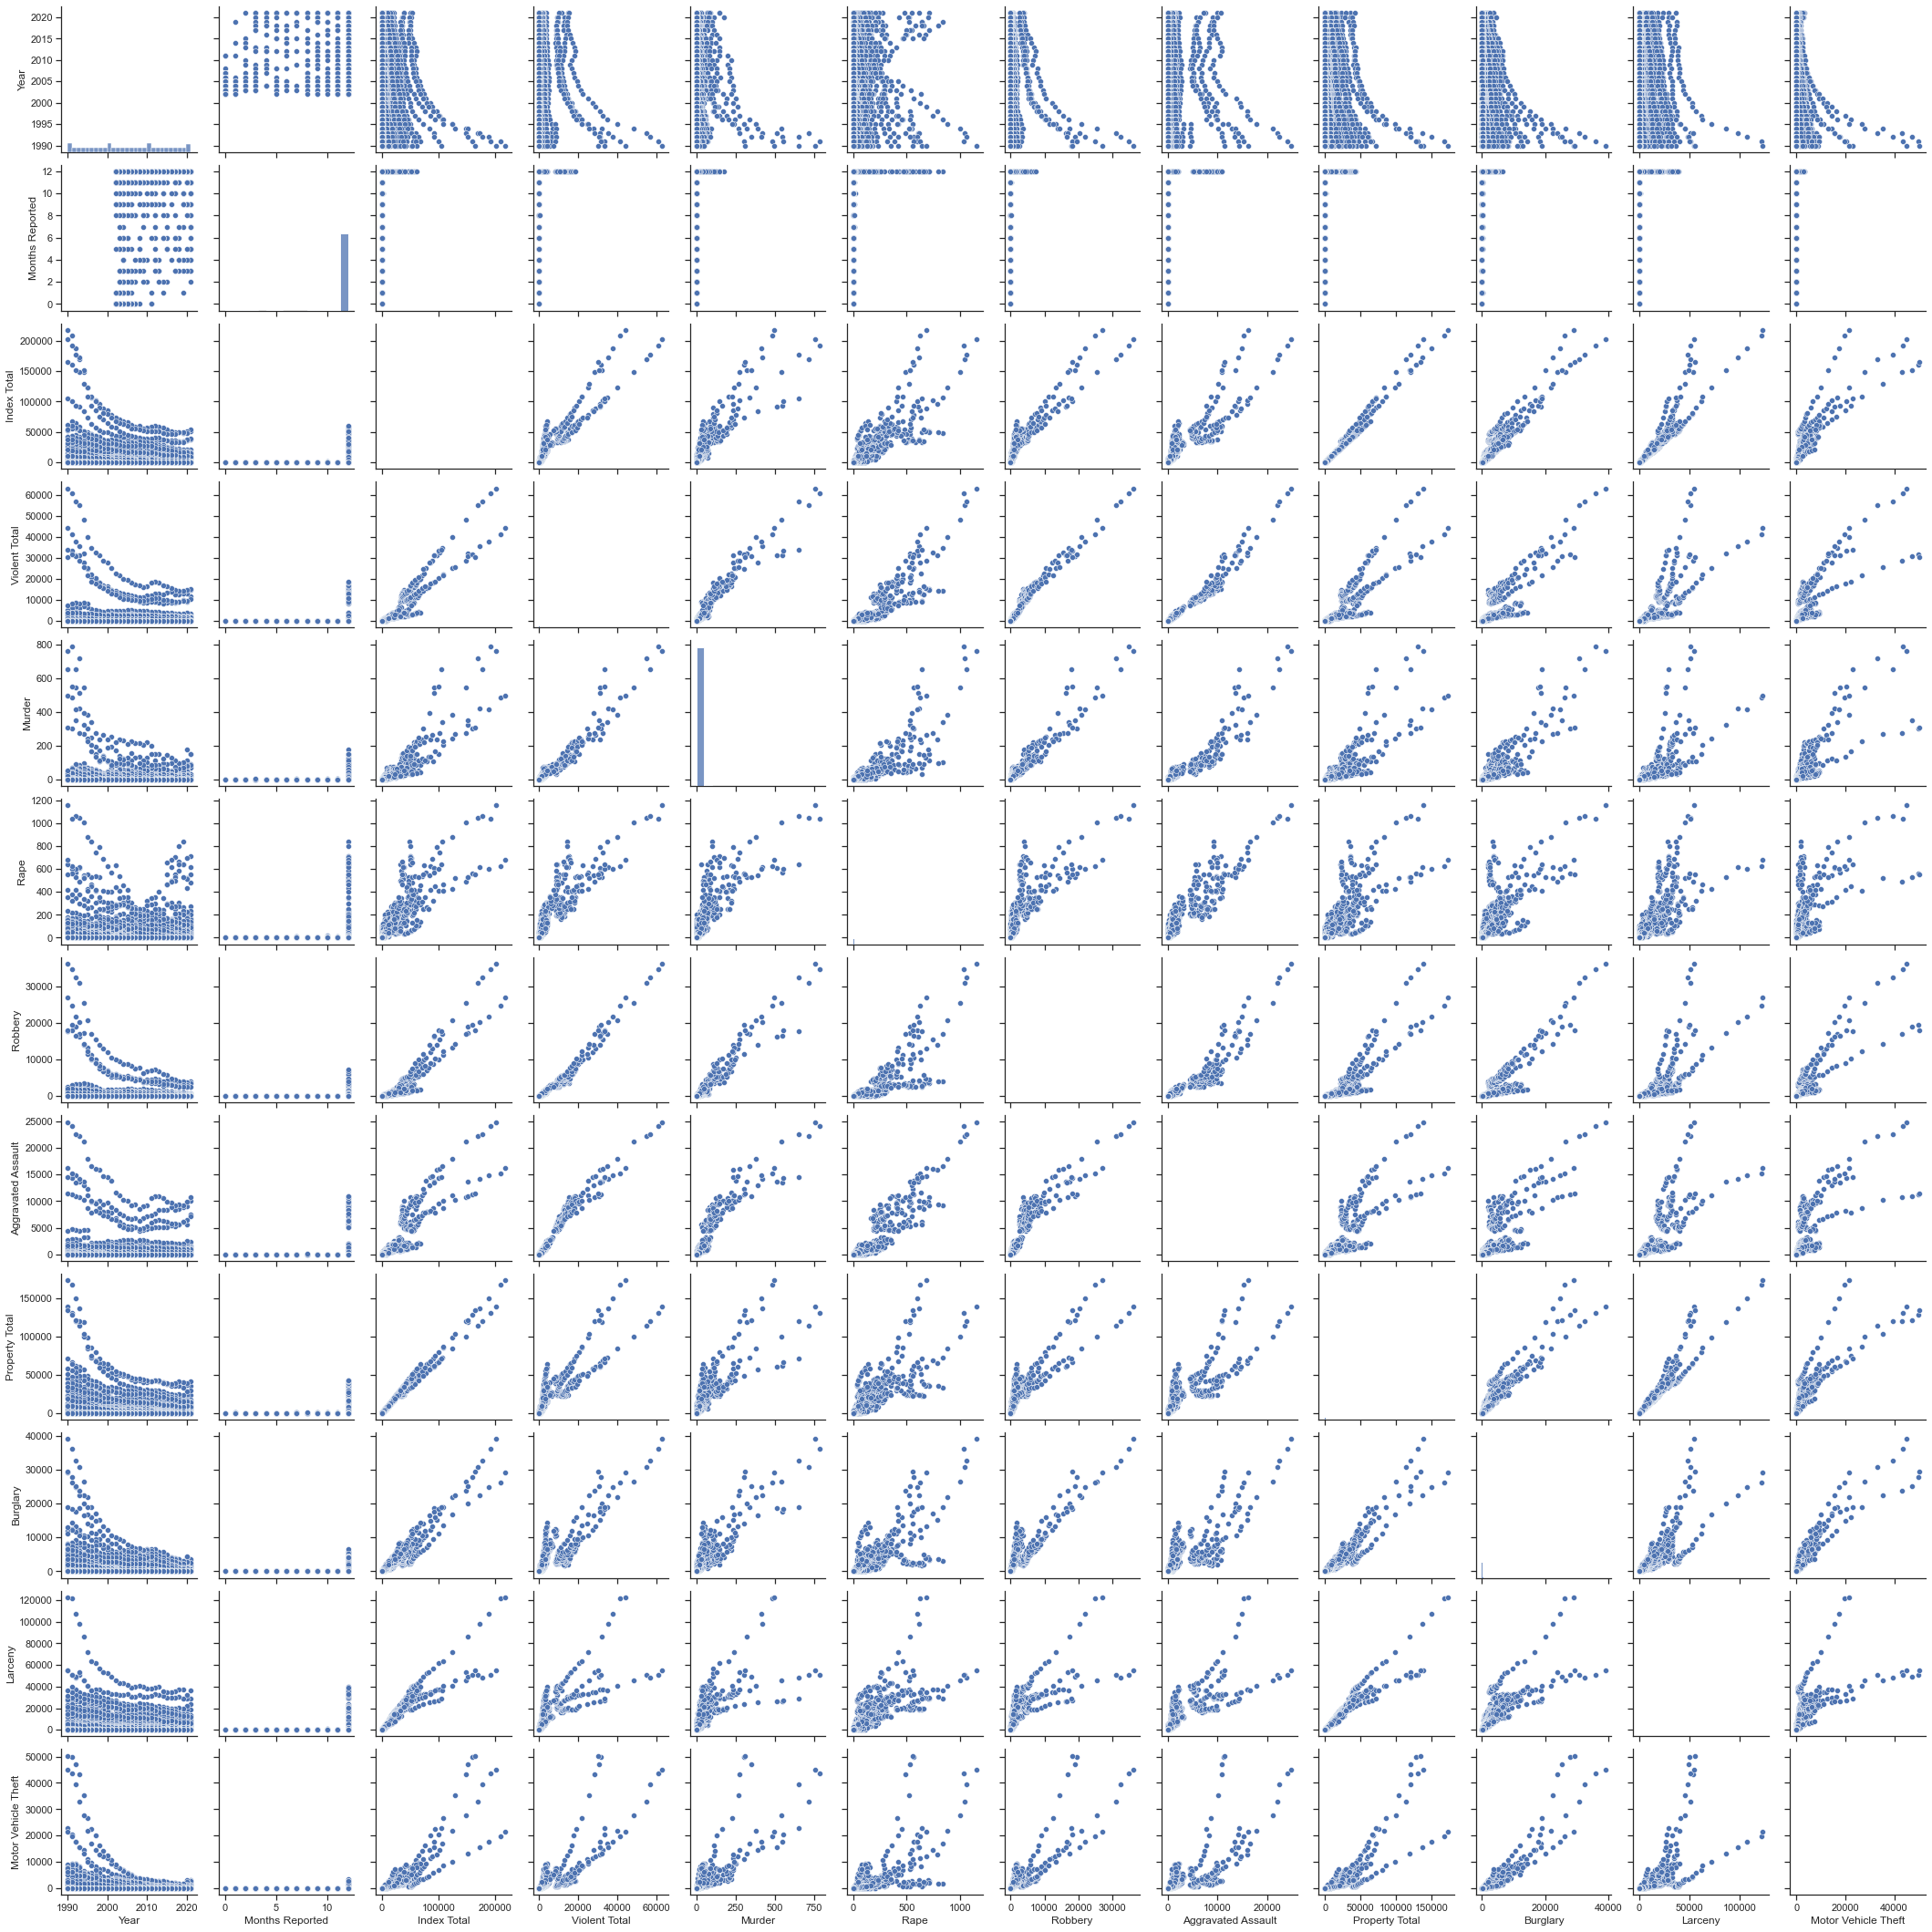

In [5]:
sns.set_theme(style='ticks')
sns.pairplot(crime_full_df)

In [6]:
# Separating data by year starting with 2016
crime16 = crime_full_df.loc[crime_full_df['Year'] == 2016]
crime16.head(5)

County                      Agency  Year  Months Reported  Index Total  \
3169  Albany              Albany City PD  2016             12.0       4317.0   
3170  Albany       Albany County Park PD  2016             12.0          2.0   
3171  Albany       Albany County Sheriff  2016             12.0        178.0   
3172  Albany  Albany County State Police  2016             12.0        137.0   
3173  Albany              Altamont Vg PD  2016             12.0         10.0   

      Violent Total  Murder  Rape  Robbery  Aggravated Assault  \
3169          849.0     2.0  58.0    248.0               541.0   
3170            0.0     0.0   0.0      0.0                 0.0   
3171           19.0     0.0   7.0      0.0                12.0   
3172           15.0     2.0   9.0      2.0                 2.0   
3173            0.0     0.0   0.0      0.0                 0.0   

      Property Total  Burglary  Larceny  Motor Vehicle Theft  \
3169          3468.0     490.0   2863.0                115.0   
3170             2.0       0.0      2.0                  0.0   
3171           159.0      25.0    125.0                  9.0   
3172           122.0       9.0    110.0                  3.0   
3173            10.0       2.0      8.0                  0.0   

                 Region  
3169  Non-New York City  
3170  Non-New York City  
3171  Non-New York City  
3172  Non-New York City  
3173  Non-New York City

In [7]:
# Test to see if dropped county total
crime16['Agency'] == 'County Total'

3169    False
3170    False
3171    False
3172    False
3173    False
        ...  
3815    False
3816     True
3817    False
3818    False
3819    False
Name: Agency, Length: 651, dtype: bool

In [8]:
# sns.set_theme(style='ticks')
# sns.pairplot(crime16)

In [9]:
crime_activities_16 = crime16[['Year', 'Motor Vehicle Theft', 'Larceny', 'Burglary', 'Property Total', 'Aggravated Assault', 'Robbery', 'Rape', 'Murder', 'County', 'Agency', 'Index Total']]
crime_activities_16.head(5)

Year  Motor Vehicle Theft  Larceny  Burglary  Property Total  \
3169  2016                115.0   2863.0     490.0          3468.0   
3170  2016                  0.0      2.0       0.0             2.0   
3171  2016                  9.0    125.0      25.0           159.0   
3172  2016                  3.0    110.0       9.0           122.0   
3173  2016                  0.0      8.0       2.0            10.0   

      Aggravated Assault  Robbery  Rape  Murder  County  \
3169               541.0    248.0  58.0     2.0  Albany   
3170                 0.0      0.0   0.0     0.0  Albany   
3171                12.0      0.0   7.0     0.0  Albany   
3172                 2.0      2.0   9.0     2.0  Albany   
3173                 0.0      0.0   0.0     0.0  Albany   

                          Agency  Index Total  
3169              Albany City PD       4317.0  
3170       Albany County Park PD          2.0  
3171       Albany County Sheriff        178.0  
3172  Albany County State Police        137.0  
3173              Altamont Vg PD         10.0

In [10]:
# Dropped county total from Agency row due to not originally knowing about it and it fudging crime rate stats
county_total = crime_activities_16[crime_activities_16['Agency'] == 'County Total'].index
crime_activities_16.drop(county_total, inplace=True)


C:\Users\Morgan\AppData\Local\Temp\ipykernel_27456\2358856866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_activities_16.drop(county_total, inplace=True)


In [11]:
# Test to see if dropped county total
crime_activities_16['Agency'] == 'County Total'

3169    False
3170    False
3171    False
3172    False
3173    False
        ...  
3814    False
3815    False
3817    False
3818    False
3819    False
Name: Agency, Length: 594, dtype: bool

In [12]:
import plotly.express as px
import plotly.graph_objects as go
import json
import requests
# Reading in geojson for graphing and county numeric codes
# ny_counties_json = pd.read_json('new.geojson')

with open('new.geojson') as file:
    ny_geojson = json.load(file)


ny_counties_fips_codes_csv = pd.read_csv('../data/ny_counties_fips_codes.csv')
ny_counties_fips_codes_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   County Name  62 non-null     object
 1   State FIPS   62 non-null     int64 
 2   County Code  62 non-null     int64 
 3   County FIPS  62 non-null     int64 
 4   ZIP Code     62 non-null     int64 
 5   File Date    62 non-null     object
dtypes: int64(4), object(2)
memory usage: 3.0+ KB


In [13]:
#Getting rid of spaces in column names
ny_counties_fips_codes_csv.columns = ny_counties_fips_codes_csv.columns.str.replace(' ','_')
ny_counties_fips_codes_csv.head(2)

County_Name  State_FIPS  County_Code  County_FIPS  ZIP_Code  File_Date
0      Albany          36            1        36001     12007  7/25/2007
1    Allegany          36            3        36003     14024  7/25/2007

In [14]:
#Changing county code to sring so I can call on the last 3 numbers
ny_counties_fips_codes_csv['County_FIPS'] = ny_counties_fips_codes_csv.County_FIPS.astype(str)

In [15]:
# Creating new column with the last three digits of they county code
ny_counties_fips_codes_csv['Three Digit County Code'] = ny_counties_fips_codes_csv['County_FIPS'].str[2:5]
ny_counties_fips_codes_csv.head(5)

County_Name  State_FIPS  County_Code County_FIPS  ZIP_Code  File_Date  \
0       Albany          36            1       36001     12007  7/25/2007   
1     Allegany          36            3       36003     14024  7/25/2007   
2        Bronx          36            5       36005     10451  7/25/2007   
3       Broome          36            7       36007     13730  7/25/2007   
4  Cattaraugus          36            9       36009     14009  7/25/2007   

  Three Digit County Code  
0                     001  
1                     003  
2                     005  
3                     007  
4                     009

In [16]:
# Use to merge with calculated data for mapping
county_code = ny_counties_fips_codes_csv[['Three Digit County Code', 'County_Name']]

In [17]:
crime_activities_16_with_countycode = crime_activities_16.merge(
    ny_counties_fips_codes_csv,
    how='left',
    left_on='County',
    right_on='County_Name'
)

In [18]:
ny_county_id_map = {}
for feature in ny_geojson['features']:
    feature['id'] = feature['properties']['county_fip']
    ny_county_id_map[feature['properties']['name']] = feature['id']

In [19]:
# Total Raw Crime Number Rate
fig = px.choropleth(crime_activities_16_with_countycode, geojson= ny_geojson, color='Index Total', locations='Three Digit County Code')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [20]:
public_trans_full16 = pd.read_csv('../data/2016_metrics.csv')
city_county =pd.read_csv('../data/ny_city_county.csv')
filtered_test_df = public_trans_full16[public_trans_full16['Mode'].isin(['CR', 'CB', 'RB', 'MB'])]
filtered_test_df = filtered_test_df.loc[filtered_test_df['State'] == 'NY']
filtered_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 1 to 3671
Data columns (total 45 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Name                                                                     89 non-null     object 
 1   City                                                                     89 non-null     object 
 2   State                                                                    89 non-null     object 
 3   Legacy NTD ID                                                            86 non-null     object 
 4   NTD ID                                                                   89 non-null     object 
 5   Organization Type                                                        89 non-null     object 
 6   Reporter Type                                                            8

In [21]:
public_trans_2016_with_county = filtered_test_df.merge(
    city_county,
    how='left',
    left_on='City',
    right_on='City'
)
public_trans_2016_with_county.head(3)

Name      City State Legacy NTD ID NTD ID  \
0  MTA New York City Transit  New York    NY          2008  20008   
1  MTA New York City Transit  New York    NY          2008  20008   
2  MTA New York City Transit  New York    NY          2008  20008   

                                   Organization Type  Reporter Type  \
0  Subsidiary Unit of a Transit Agency, Reporting...  Full Reporter   
1  Subsidiary Unit of a Transit Agency, Reporting...  Full Reporter   
2  Subsidiary Unit of a Transit Agency, Reporting...  Full Reporter   

  Primary UZA\n Population Agency VOMS Mode  ... Vehicle Revenue Miles  \
0              18,351,295       11,004   MB  ...           86,863,364    
1              18,351,295       11,004   CB  ...            9,214,967    
2              18,351,295       11,004   RB  ...            2,988,560    

  Vehicle Revenue Miles Questionable  Any data questionable? Unnamed: 39  \
0                                NaN                      No         NaN   
1                                NaN                      No         NaN   
2                                NaN                      No         NaN   

  Unnamed: 40  Unnamed: 41                            1 Unnamed: 43  \
0         NaN          NaN  Show questionable data tags         NaN   
1         NaN          NaN                          NaN         NaN   
2         NaN          NaN                          NaN         NaN   

  Unnamed: 44    County  
0         NaN  New York  
1         NaN  New York  
2         NaN  New York  

[3 rows x 46 columns]

In [22]:
public_trans_2016_with_county['MB'] = public_trans_2016_with_county['Mode'] == 'MB'
public_trans_2016_with_county['CB'] = public_trans_2016_with_county['Mode'] == 'CB'
public_trans_2016_with_county['RB'] = public_trans_2016_with_county['Mode'] == 'RB'
public_trans_2016_with_county['CR'] = public_trans_2016_with_county['Mode'] == 'CR'

In [23]:
# Starting to calculate crime rate. Adding in population dataset
full_annual_population = pd.read_csv('../data/annual_pop.csv')
full_annual_population


FIPS Code          Geography  Year                     Program Type  \
0         36001             Albany  2021   Postcensal Population Estimate   
1         36003           Allegany  2021   Postcensal Population Estimate   
2         36005              Bronx  2021   Postcensal Population Estimate   
3         36007             Broome  2021   Postcensal Population Estimate   
4         36009        Cattaraugus  2021   Postcensal Population Estimate   
...         ...                ...   ...                              ...   
3647      36115   WashingtonCounty  1970  Intercensal Population Estimate   
3648      36117        WayneCounty  1970  Intercensal Population Estimate   
3649      36119  WestchesterCounty  1970  Intercensal Population Estimate   
3650      36121      WyomingCounty  1970  Intercensal Population Estimate   
3651      36123        YatesCounty  1970  Intercensal Population Estimate   

      Population  
0         313743  
1          46106  
2        1424948  
3         197240  
4          76426  
...          ...  
3647       52938  
3648       79703  
3649      894227  
3650       38000  
3651       19978  

[3652 rows x 5 columns]

In [24]:
crime_activities_16_with_countycode['County'].astype(str)

0       Albany
1       Albany
2       Albany
3       Albany
4       Albany
        ...   
589    Wyoming
590    Wyoming
591      Yates
592      Yates
593      Yates
Name: County, Length: 594, dtype: object

In [25]:
pop_2016 = full_annual_population.loc[full_annual_population['Year'] == 2016]
pop_2016 = pop_2016.iloc[1: , :]
pop_2016['Geography'].astype(str)
pop_2016['County'] = pop_2016['Geography']
pop_2016

FIPS Code    Geography  Year                    Program Type  Population  \
377      36001       Albany  2016  Postcensal Population Estimate      307810   
378      36003     Allegany  2016  Postcensal Population Estimate       47063   
379      36005        Bronx  2016  Postcensal Population Estimate     1443678   
380      36007       Broome  2016  Postcensal Population Estimate      194575   
381      36009  Cattaraugus  2016  Postcensal Population Estimate       77711   
..         ...          ...   ...                             ...         ...   
434      36115   Washington  2016  Postcensal Population Estimate       61812   
435      36117        Wayne  2016  Postcensal Population Estimate       90823   
436      36119  Westchester  2016  Postcensal Population Estimate      970461   
437      36121      Wyoming  2016  Postcensal Population Estimate       40450   
438      36123        Yates  2016  Postcensal Population Estimate       25080   

          County  
377       Albany  
378     Allegany  
379        Bronx  
380       Broome  
381  Cattaraugus  
..           ...  
434   Washington  
435        Wayne  
436  Westchester  
437      Wyoming  
438        Yates  

[62 rows x 6 columns]

In [26]:
county_pop = pop_2016[['Geography', 'Population']]
county_pop


Geography  Population
377       Albany      307810
378     Allegany       47063
379        Bronx     1443678
380       Broome      194575
381  Cattaraugus       77711
..           ...         ...
434   Washington       61812
435        Wayne       90823
436  Westchester      970461
437      Wyoming       40450
438        Yates       25080

[62 rows x 2 columns]

In [27]:
# Merged crime activities df that also consisted of county and city df to population df
crime_activities_16_with_countycode_pop = crime_activities_16_with_countycode.merge(
    pop_2016,
    how='left',
    left_on='County',
    right_on='County'
)


In [28]:
county_crime_total1 = crime_activities_16_with_countycode_pop[['Index Total', 'County', 'Geography']]
county_crime_total1

Index Total   County Geography
0         4317.0   Albany    Albany
1            2.0   Albany    Albany
2          178.0   Albany    Albany
3          137.0   Albany    Albany
4           10.0   Albany    Albany
..           ...      ...       ...
589        166.0  Wyoming   Wyoming
590         36.0  Wyoming   Wyoming
591         70.0    Yates     Yates
592        232.0    Yates     Yates
593         18.0    Yates     Yates

[594 rows x 3 columns]

In [29]:
# Made variable for total number of crimes by county
county_crime_total = crime_activities_16_with_countycode_pop.groupby('County')['Index Total'].sum().apply(print)

8766.0
572.0
36834.0
5424.0
1262.0
1428.0
3328.0
2064.0
966.0
1395.0
837.0
820.0
671.0
4116.0
25816.0
397.0
706.0
1182.0
1263.0
554.0
54.0
1107.0
2381.0
50802.0
236.0
886.0
1031.0
18765.0
1024.0
15278.0
46653.0
6145.0
5232.0
11116.0
1866.0
7311.0
749.0
2314.0
779.0
603.0
33800.0
3658.0
6313.0
3562.0
2846.0
4685.0
384.0
118.0
643.0
1739.0
1526.0
23092.0
1229.0
463.0
1957.0
2644.0
1201.0
595.0
1623.0
12543.0
327.0
320.0


In [30]:
crime_pop_county_2016 = pd.merge(county_crime_total1, county_pop, on=['Geography'])
crime_pop_county_2016

Index Total   County Geography  Population
0         4317.0   Albany    Albany      307810
1            2.0   Albany    Albany      307810
2          178.0   Albany    Albany      307810
3          137.0   Albany    Albany      307810
4           10.0   Albany    Albany      307810
..           ...      ...       ...         ...
589        166.0  Wyoming   Wyoming       40450
590         36.0  Wyoming   Wyoming       40450
591         70.0    Yates     Yates       25080
592        232.0    Yates     Yates       25080
593         18.0    Yates     Yates       25080

[594 rows x 4 columns]

In [31]:
crime_pop_county_2016['Index_Total'] = crime_pop_county_2016['Index Total']
crime_pop_county_2016.drop(columns='Index Total')
crime_pop_county_2016

Index Total   County Geography  Population  Index_Total
0         4317.0   Albany    Albany      307810       4317.0
1            2.0   Albany    Albany      307810          2.0
2          178.0   Albany    Albany      307810        178.0
3          137.0   Albany    Albany      307810        137.0
4           10.0   Albany    Albany      307810         10.0
..           ...      ...       ...         ...          ...
589        166.0  Wyoming   Wyoming       40450        166.0
590         36.0  Wyoming   Wyoming       40450         36.0
591         70.0    Yates     Yates       25080         70.0
592        232.0    Yates     Yates       25080        232.0
593         18.0    Yates     Yates       25080         18.0

[594 rows x 5 columns]

In [32]:
county_crime_total = crime_pop_county_2016.groupby('County', as_index=False)['Index_Total'].sum()
county_crime_total

County  Index_Total
0        Albany       8766.0
1      Allegany        572.0
2         Bronx      36834.0
3        Broome       5424.0
4   Cattaraugus       1262.0
..          ...          ...
57   Washington        595.0
58        Wayne       1623.0
59  Westchester      12543.0
60      Wyoming        327.0
61        Yates        320.0

[62 rows x 2 columns]

In [33]:
county_crime_total1 = crime_pop_county_2016.groupby('County', as_index=False)['Population'].max()
county_crime_total1

County  Population
0        Albany      307810
1      Allegany       47063
2         Bronx     1443678
3        Broome      194575
4   Cattaraugus       77711
..          ...         ...
57   Washington       61812
58        Wayne       90823
59  Westchester      970461
60      Wyoming       40450
61        Yates       25080

[62 rows x 2 columns]

In [34]:
crime_rate_df = pd.merge(county_crime_total1, county_crime_total, on=['County'])
crime_rate_df

County  Population  Index_Total
0        Albany      307810       8766.0
1      Allegany       47063        572.0
2         Bronx     1443678      36834.0
3        Broome      194575       5424.0
4   Cattaraugus       77711       1262.0
..          ...         ...          ...
57   Washington       61812        595.0
58        Wayne       90823       1623.0
59  Westchester      970461      12543.0
60      Wyoming       40450        327.0
61        Yates       25080        320.0

[62 rows x 3 columns]

In [35]:
crime_rate_df['Crime_Rate'] = crime_rate_df['Index_Total'] / crime_rate_df['Population'] *100000 
crime_rate_df['County_Name'] = crime_rate_df['County']
crime_rate_df

County  Population  Index_Total   Crime_Rate  County_Name
0        Albany      307810       8766.0  2847.860693       Albany
1      Allegany       47063        572.0  1215.392134     Allegany
2         Bronx     1443678      36834.0  2551.399966        Bronx
3        Broome      194575       5424.0  2787.614031       Broome
4   Cattaraugus       77711       1262.0  1623.965719  Cattaraugus
..          ...         ...          ...          ...          ...
57   Washington       61812        595.0   962.596260   Washington
58        Wayne       90823       1623.0  1786.992282        Wayne
59  Westchester      970461      12543.0  1292.478523  Westchester
60      Wyoming       40450        327.0   808.405439      Wyoming
61        Yates       25080        320.0  1275.917065        Yates

[62 rows x 5 columns]

In [36]:
crime_rate_map = pd.merge(crime_rate_df, county_code, on=['County_Name'])
crime_rate_map

County  Population  Index_Total   Crime_Rate  County_Name  \
0        Albany      307810       8766.0  2847.860693       Albany   
1      Allegany       47063        572.0  1215.392134     Allegany   
2         Bronx     1443678      36834.0  2551.399966        Bronx   
3        Broome      194575       5424.0  2787.614031       Broome   
4   Cattaraugus       77711       1262.0  1623.965719  Cattaraugus   
..          ...         ...          ...          ...          ...   
57   Washington       61812        595.0   962.596260   Washington   
58        Wayne       90823       1623.0  1786.992282        Wayne   
59  Westchester      970461      12543.0  1292.478523  Westchester   
60      Wyoming       40450        327.0   808.405439      Wyoming   
61        Yates       25080        320.0  1275.917065        Yates   

   Three Digit County Code  
0                      001  
1                      003  
2                      005  
3                      007  
4                      009  
..                     ...  
57                     115  
58                     117  
59                     119  
60                     121  
61                     123  

[62 rows x 6 columns]

In [37]:
# New York Crime Rate
fig = px.choropleth(crime_rate_map, geojson= ny_geojson, color='Crime_Rate', locations='Three Digit County Code')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [38]:
crime_rate_map['Three Digit County Code'] = crime_rate_map['Three Digit County Code'].astype(str)

In [39]:
crime_rate_map.to_csv('../data/2016_crime.csv')